In [1]:
import pytest
import torch

from markov_bridges.configs.config_classes.data.music_configs import LakhPianoRollConfig
from markov_bridges.configs.config_classes.generative_models.cjb_config import CJBConfig
from markov_bridges.configs.config_classes.networks.temporal_networks_config import SequenceTransformerConfig
from markov_bridges.configs.experiments_configs.music_experiments import conditional_music_experiment

from markov_bridges.models.generative_models.cjb import CJB
from markov_bridges.models.generative_models.cjb_rate import ClassificationForwardRate
from markov_bridges.models.pipelines.pipeline_cjb import CJBPipeline
from markov_bridges.models.trainers.cjb_trainer import CJBTrainer

from markov_bridges.data.utils import get_dataloaders

In [2]:
from markov_bridges.utils.plots.music_plots import plot_songs

In [3]:
model_config = conditional_music_experiment()
model_config.temporal_network = SequenceTransformerConfig(num_heads=1,num_layers=1)

dataloader = get_dataloaders(model_config)
device = torch.device("cpu")
forward_rate = ClassificationForwardRate(model_config, device).to(device)
databatch = dataloader.get_databatch()

pipeline = CJBPipeline(model_config,forward_rate,dataloader)
data_sample = pipeline.generate_sample(x_0=databatch,return_origin=True)


20it [00:06,  3.01it/s]


torch.Size([32, 256])


In [15]:
generative_sample = data_sample.raw_sample
original_sample = dataloader.join_context(data_sample.x_0.context_discrete,data_sample.x_0.target_discrete)

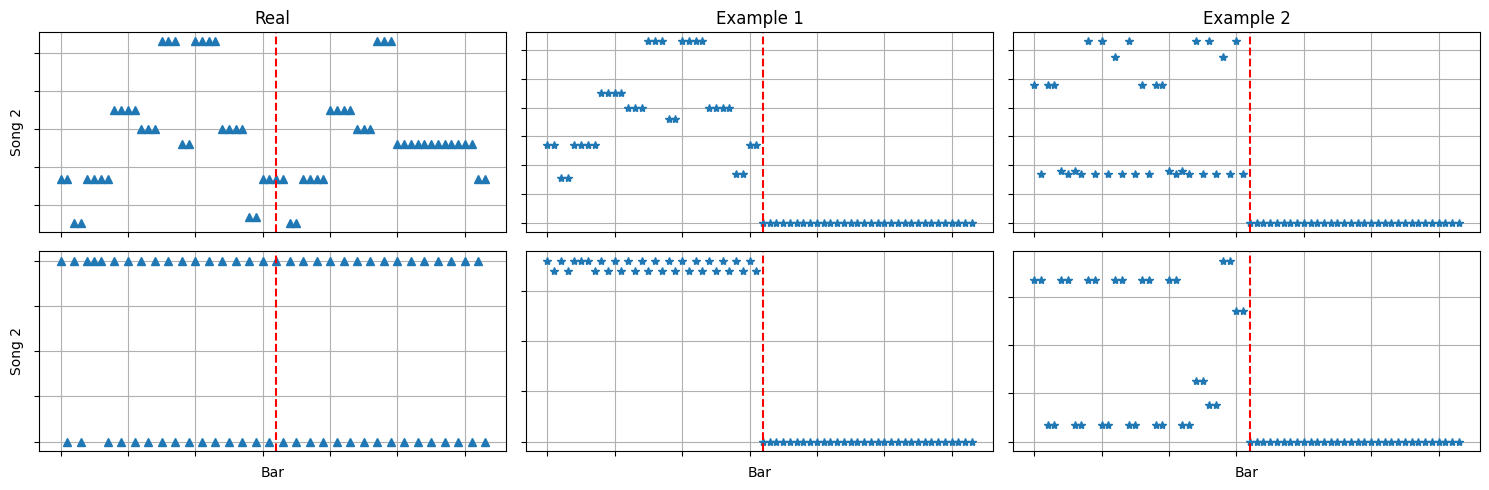

In [16]:
plot_songs(original_sample,generative_sample)